In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', color_codes=True)

# 0) Loading the dataset

In [5]:
iris_df = pd.read_csv("https://repo.hops.works/master/hopsworks-tutorials/data/iris.csv")
iris_df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,variety
25,5.0,3.0,1.6,0.2,Setosa
15,5.7,4.4,1.5,0.4,Setosa
13,4.3,3.0,1.1,0.1,Setosa
119,6.0,2.2,5.0,1.5,Virginica
115,6.4,3.2,5.3,2.3,Virginica
87,6.3,2.3,4.4,1.3,Versicolor
118,7.7,2.6,6.9,2.3,Virginica
106,4.9,2.5,4.5,1.7,Virginica
37,4.9,3.6,1.4,0.1,Setosa
22,4.6,3.6,1.0,0.2,Setosa


# 1) EDA

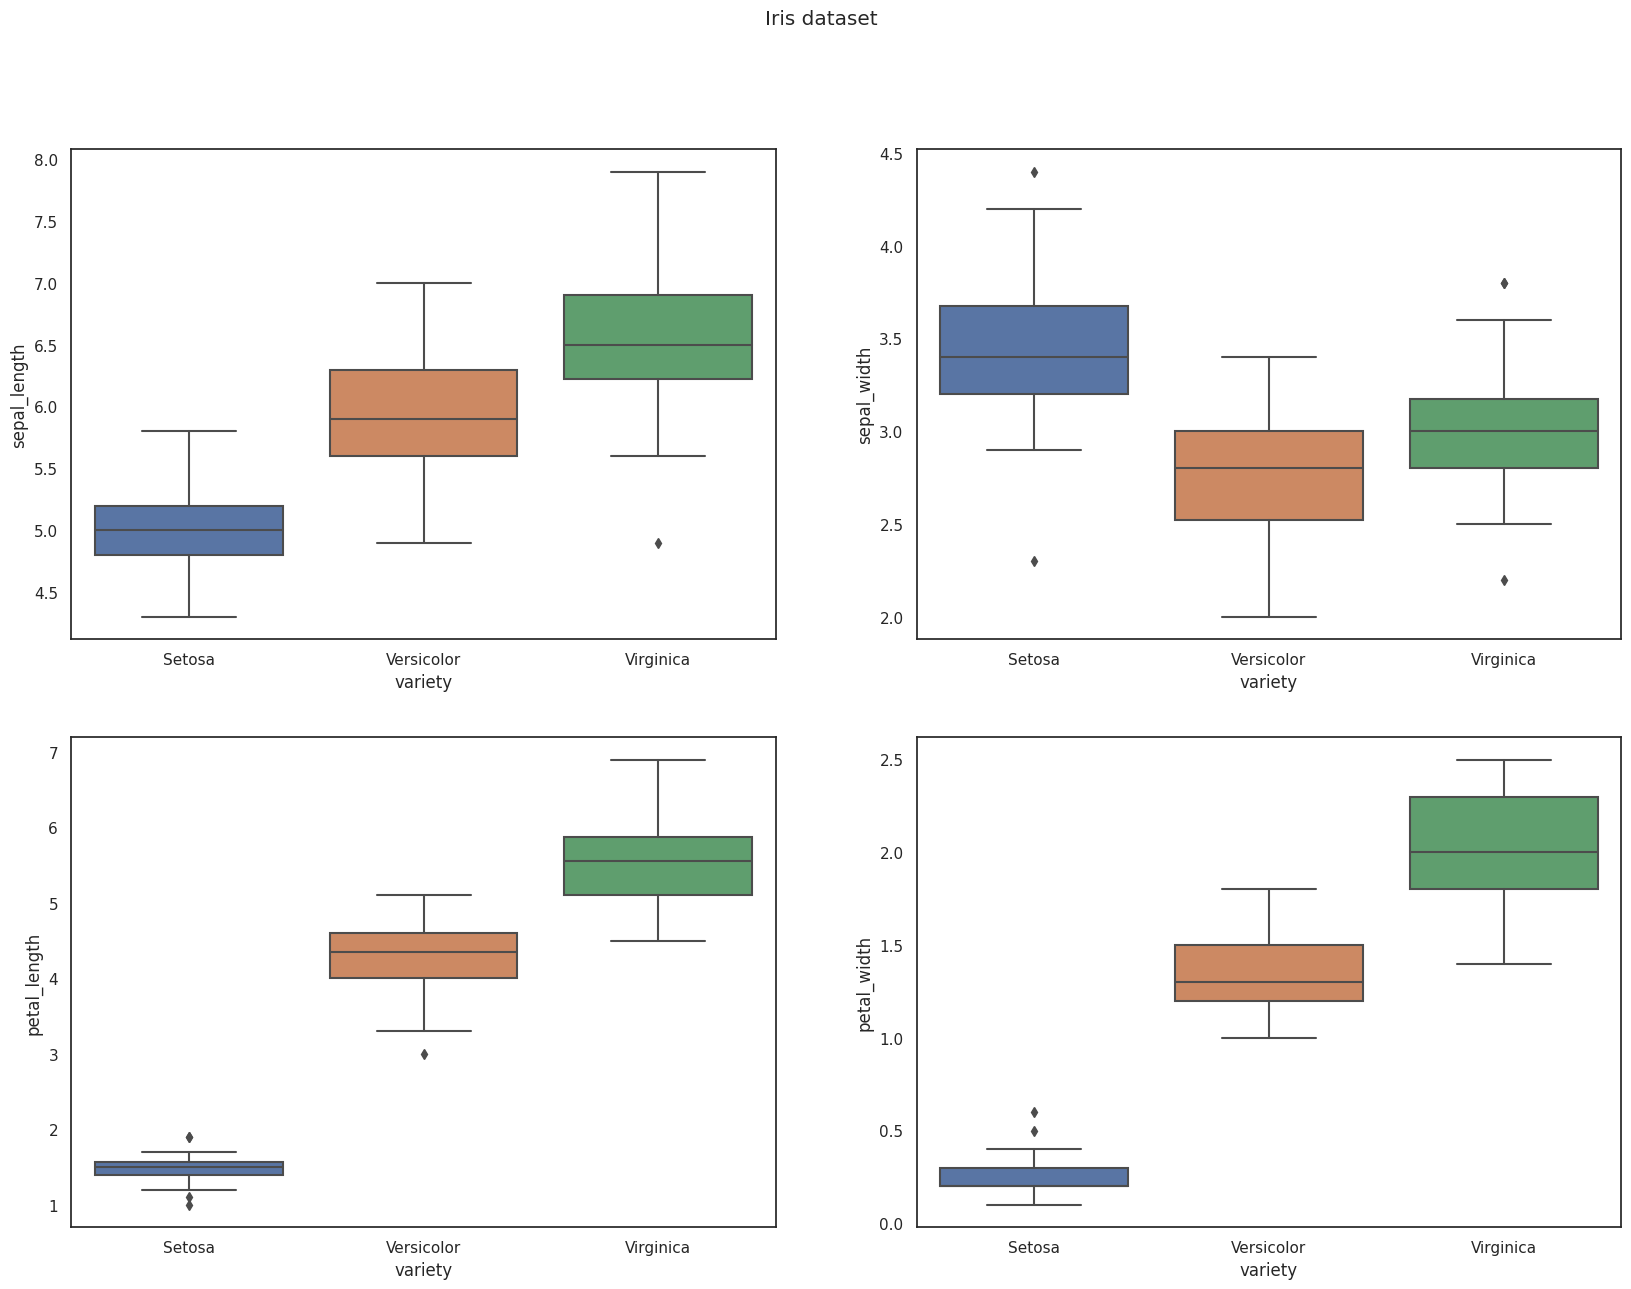

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(20,14))
sns.boxplot(x='variety', y='sepal_length', data=iris_df, ax=ax[0, 0])
sns.boxplot(x='variety', y='sepal_width', data=iris_df, ax=ax[0, 1])
sns.boxplot(x='variety', y='petal_length', data=iris_df, ax=ax[1, 0])
sns.boxplot(x='variety', y='petal_width', data=iris_df, ax=ax[1, 1])
fig.suptitle("Iris dataset")
plt.show()

# 2) Creating the training and testing dataset

## 2.1) Defining the feature and label data

In [18]:
FEATURE_COLS = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
LABEL_COLS = ["variety"]
features = iris_df[FEATURE_COLS]
labels = iris_df[LABEL_COLS]

## 2.2) Splitting training and test

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                    test_size=0.2, random_state=42)
y_train.head()

,variety
22,Setosa
15,Setosa
65,Versicolor
11,Setosa
42,Setosa


# 3) Fiting the `KNeighborsClassifier`

In [22]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=2)

# 4) Checking the metrics of the trained model

In [23]:
y_pred = model.predict(X_test)
y_pred

array(['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
       'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Virginica', 'Virginica', 'Setosa', 'Setosa'], dtype=object)

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



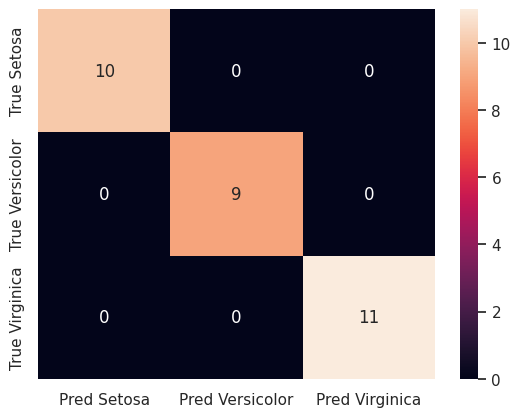

In [26]:
from sklearn.metrics import confusion_matrix

results = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(results,
                     ["True Setosa", "True Versicolor", "True Virginica"],
                     ["Pred Setosa", "Pred Versicolor", "Pred Virginica"],
                     )

sns.heatmap(df_cm, annot=True);

# 5) Create gradio UI

In [27]:
import gradio as gr
import numpy as np
from PIL import Image
import requests


def iris(sepal_length: float, sepal_width: float, petal_length: float, petal_width: float):
    input_list = []
    input_list.append(sepal_length)
    input_list.append(sepal_width)
    input_list.append(petal_length)
    input_list.append(petal_width)
    # 'res' is a list of predictions returned as the label.
    res = model.predict(np.asarray(input_list).reshape(1, -1)) 
    flower_url = f"https://raw.githubusercontent.com/featurestoreorg/serverless-ml-course/main/src/01-module/assets/{res[0]}.png"
    img = Image.open(requests.get(flower_url, stream=True).raw)            
    return img
        
demo = gr.Interface(
    fn=iris,
    title="Iris Flower Predictive Analytics",
    description="Experiment with sepal/petal lengths/widths to predict which flower it is.",
    allow_flagging="never",
    inputs=[
        gr.inputs.Number(default=1.0, label="sepal length (cm)"),
        gr.inputs.Number(default=1.0, label="sepal width (cm)"),
        gr.inputs.Number(default=1.0, label="petal length (cm)"),
        gr.inputs.Number(default=1.0, label="petal width (cm)"),
        ],
    outputs=gr.Image(type="pil"))

demo.launch(share=True)

/home/nahum/Documents/serverless-ml-course/.venv/lib/python3.8/site-packages/gradio/inputs.py:58: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/nahum/Documents/serverless-ml-course/.venv/lib/python3.8/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://29609.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7fd4cddc0040>,
 'http://127.0.0.1:7860/',
 'https://29609.gradio.app')

/home/nahum/Documents/serverless-ml-course/.venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/nahum/Documents/serverless-ml-course/.venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/nahum/Documents/serverless-ml-course/.venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
